In [1]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
train_df = pd.read_csv('Trains.csv')
train_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_df

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [4]:
train_df.shape

(2100, 27)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [6]:
train_df.isnull().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [7]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,2019-03-31 13:33:05,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 13:33:04,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,2019-03-31 15:04:09,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,2019-03-31 15:04:08,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,2019-03-31 17:31:11,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:31:09,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,2019-03-31 17:32:15,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:32:14,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,2019-03-31 17:34:41,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,2019-03-31 17:34:40,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [8]:
test_df.shape

(905, 19)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            905 non-null    object 
 1   TransactionStartTime  905 non-null    object 
 2   Value                 905 non-null    float64
 3   Amount                905 non-null    float64
 4   TransactionId         905 non-null    object 
 5   BatchId               905 non-null    object 
 6   SubscriptionId        905 non-null    object 
 7   CurrencyCode          905 non-null    object 
 8   CountryCode           905 non-null    int64  
 9   ProviderId            905 non-null    object 
 10  ProductId             905 non-null    object 
 11  ProductCategory       905 non-null    object 
 12  ChannelId             905 non-null    object 
 13  TransactionStatus     905 non-null    int64  
 14  IssuedDateLoan        478 non-null    object 
 15  LoanId                4

In [10]:
test_df.duplicated().sum()

0

In [11]:
test_df.isnull().sum()

CustomerId                0
TransactionStartTime      0
Value                     0
Amount                    0
TransactionId             0
BatchId                   0
SubscriptionId            0
CurrencyCode              0
CountryCode               0
ProviderId                0
ProductId                 0
ProductCategory           0
ChannelId                 0
TransactionStatus         0
IssuedDateLoan          427
LoanId                  427
InvestorId              427
LoanApplicationId       427
ThirdPartyId            427
dtype: int64

In [12]:
df = pd.read_csv('unlinked_masked_final.csv')
df.head()

,TransactionId,BatchId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime
0,TransactionId_18876,BatchId_7899,CustomerId_250,UGX,256,ProviderId_2,ProductId_8,data_bundles,ChannelId_3,2000.0,2000.0,30/6/19 22:57:49
1,TransactionId_15089,BatchId_8829,CustomerId_423,UGX,256,ProviderId_5,ProductId_7,airtime,ChannelId_3,800.0,800.0,30/6/19 22:39:11
2,TransactionId_9561,BatchId_15250,CustomerId_423,UGX,256,ProviderId_2,ProductId_10,financial_services,ChannelId_3,2000.0,2000.0,30/6/19 22:35:53
3,TransactionId_3635,BatchId_14442,CustomerId_316,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_3,1000.0,1000.0,30/6/19 19:47:00
4,TransactionId_3104,BatchId_5171,CustomerId_193,UGX,256,ProviderId_5,ProductId_1,airtime,ChannelId_3,5000.0,5000.0,30/6/19 19:11:01


In [13]:
df.shape

(16327, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         16327 non-null  object 
 1   BatchId               16327 non-null  object 
 2   CustomerId            16327 non-null  object 
 3   CurrencyCode          16327 non-null  object 
 4   CountryCode           16327 non-null  int64  
 5   ProviderId            16327 non-null  object 
 6   ProductId             16327 non-null  object 
 7   ProductCategory       16327 non-null  object 
 8   ChannelId             16327 non-null  object 
 9   Amount                16327 non-null  float64
 10  Value                 16327 non-null  float64
 11  TransactionStartTime  16327 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.5+ MB


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

TransactionId           0
BatchId                 0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
dtype: int64

In [17]:

# train_df.drop('DueDate', axis=1, inplace=True)
# train_df.drop('Currency', axis=1, inplace=True)
# train_df.drop('IsThirdPartyConfirmed', axis=1, inplace=True)
# train_df.drop('PayBackId', axis=1, inplace=True)
# train_df.drop('IsFinalPayBack', axis=1, inplace=True)
# train_df.drop('PaidOnDate', axis=1, inplace=True)



In [18]:
# merged_data = train_df.merge(
#     df, on=['CustomerId', 'TransactionId', 'BatchId', 'CurrencyCode', 'CountryCode',
#                                'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
#                                'Value', 'TransactionStartTime'],
#     suffixes=('train', 'unlinked_masked_final'),
#     how='outer'
# )

In [19]:
# import pandas as pd

# columns_with_nulls = ['InvestorId','LoanId','LoanApplicationId','ThirdPartyId','SubscriptionId']


# for index, row in merged_data.iterrows():
#     customer_id = row['CustomerId']

#     if customer_id in merged_data['CustomerId'].values:
#         filling_row = merged_data[merged_data['CustomerId'] == customer_id].iloc[0]


#         for column in columns_with_nulls:
#             if pd.isnull(row[column]):
#                 merged_data.at[index, column] = filling_row[column]



In [20]:
# # Group the data by customer ID
# grouped = merged_data.groupby('CustomerId', group_keys=False)

# # Define a function to handle missing mode values and replace nulls with the mode
# def replace_missing_with_mode(group):
#     mode_values = group['TransactionStatus'].mode()
#     if not mode_values.empty:
#         mode = mode_values.iloc[0]
#         group['TransactionStatus'].fillna(mode, inplace=True)
#     return group

# # Apply the function to each customer group and update the merged_data
# merged_data = grouped.apply(replace_missing_with_mode)




In [21]:
# # Group the data by customer ID
# grouped = merged_data.groupby('CustomerId', group_keys=False)

# # Define a function to handle missing mode values and replace nulls with the mode
# def replace_missing_with_mode(group):
#     mode_values = group['IssuedDateLoan'].mode()
#     if not mode_values.empty:
#         mode = mode_values.iloc[0]
#         group['IssuedDateLoan'].fillna(mode, inplace=True)
#     return group

# # Apply the function to each customer group and update the merged_data
# merged_data = grouped.apply(replace_missing_with_mode)

# #



In [22]:
# # Group the data by customer ID
# grouped = merged_data.groupby('CustomerId', group_keys=False)

# # Define a function to handle missing mode values and replace nulls with the mode
# def replace_missing_with_mode(group):
#     mode_values = group['IsDefaulted'].mode()
#     if not mode_values.empty:
#         mode = mode_values.iloc[0]
#         group['IsDefaulted'].fillna(mode, inplace=True)
#     return group

# # Apply the function to each customer group and update the merged_data
# merged_data = grouped.apply(replace_missing_with_mode)



In [23]:
# # Calculate the average of non-null values in the 'AmountLoan' column
# average_amount = merged_data['AmountLoan'].mean()

# # Fill the null values with the average amount
# merged_data.loc[merged_data['AmountLoan'].isnull(), 'AmountLoan'] = average_amount

# # Round the 'AmountLoan' column to 2 decimal places
# merged_data['AmountLoan'] = merged_data['AmountLoan'].round(2)

In [24]:
# final_data = merged_data.merge(
#     df, on=['CustomerId', 'TransactionId', 'BatchId', 'CurrencyCode', 'CountryCode',
#                                'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
#                                'Value', 'TransactionStartTime'],
#     suffixes=('merged_data', 'test_df'),
#     how='outer'
# )

In [25]:
final_df = pd.read_csv('customer_credit.csv')
final_df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,TransactionStatus,IssuedDateLoan,AmountLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId,PaidOnDate,DueDate,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550,-550,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,0,2018-11-27 19:11:26,11824.44,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,2018-10-23 15:26:58,2018-11-22 15:20:53,1
1,CustomerId_27,2018-09-21 12:17:39,550,-550,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,0,2018-11-27 19:11:26,11824.44,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,2018-10-23 15:26:58,2018-11-22 15:20:53,1
2,CustomerId_27,2018-09-21 12:17:39,550,-550,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,0,2018-11-27 19:11:26,11824.44,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,2018-10-24 6:38:49,2018-11-23 6:33:57,1
3,CustomerId_27,2018-09-21 12:17:39,550,-550,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,0,2018-11-27 19:11:26,11824.44,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,2018-10-24 7:01:48,2018-11-23 6:55:58,1
4,CustomerId_27,2018-09-21 12:17:39,550,-550,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,0,2018-11-27 19:11:26,11824.44,LoanId_1438,InvestorId_2,LoanApplicationId_1171,ThirdPartyId_1265,2018-10-30 10:54:55,2018-11-29 10:25:24,1


In [26]:
final_df.isnull().sum()

CustomerId              0
TransactionStartTime    0
Value                   0
Amount                  0
TransactionId           0
BatchId                 0
SubscriptionId          0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
TransactionStatus       0
IssuedDateLoan          0
AmountLoan              0
LoanId                  0
InvestorId              0
LoanApplicationId       0
ThirdPartyId            0
PaidOnDate              0
DueDate                 0
IsDefaulted             0
dtype: int64

In [27]:
final_df.duplicated().sum()

2300

In [28]:
final_df = final_df.drop_duplicates()

In [29]:
final_df.dtypes

CustomerId               object
TransactionStartTime     object
Value                     int64
Amount                    int64
TransactionId            object
BatchId                  object
SubscriptionId           object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
TransactionStatus         int64
IssuedDateLoan           object
AmountLoan              float64
LoanId                   object
InvestorId               object
LoanApplicationId        object
ThirdPartyId             object
PaidOnDate               object
DueDate                  object
IsDefaulted               int64
dtype: object

In [30]:
final_df.Value = final_df['Value'].astype(int)
final_df.Amount = final_df['Amount'].astype(int)
final_df.IsDefaulted = final_df['IsDefaulted'].astype(int)
final_df.TransactionStatus = final_df['TransactionStatus'].astype(int)
final_df.AmountLoan = final_df['AmountLoan'].astype(int)

In [31]:
final_df['PaidOnDate'] = pd.to_datetime(final_df['PaidOnDate'])
final_df['DueDate'] = pd.to_datetime(final_df['DueDate'])

# Extract day, month, and year components and create new columns
final_df['DueDay'] = final_df['DueDate'].dt.day
final_df['DueMonth'] = final_df['DueDate'].dt.month
final_df['DueYear'] = final_df['DueDate'].dt.year

final_df['PaidOnDay'] = final_df['PaidOnDate'].dt.day
final_df['PaidOnMonth'] = final_df['PaidOnDate'].dt.month
final_df['PaidOnYear'] = final_df['PaidOnDate'].dt.year

# Drop the original 'PaidOnDate' and 'DueDate' columns if needed
# final_df.drop(columns=['PaidOnDate', 'DueDate'], inplace=True)

# Now you have separate columns for the day, month, and year components of 'PaidOnDate' and 'DueDate'.

In [32]:
label_encoder = preprocessing.LabelEncoder()
final_df['CustomerId'] = label_encoder.fit_transform(final_df['CustomerId'])
final_df['TransactionId'] = label_encoder.fit_transform(final_df['TransactionId'])
final_df['BatchId'] = label_encoder.fit_transform(final_df['BatchId'])
final_df['SubscriptionId'] = label_encoder.fit_transform(final_df['SubscriptionId'])
final_df['ProviderId'] = label_encoder.fit_transform(final_df['ProviderId'])
final_df['ProductId'] = label_encoder.fit_transform(final_df['ProductId'])
final_df['ChannelId'] = label_encoder.fit_transform(final_df['ChannelId'])
final_df['ProductCategory'] = label_encoder.fit_transform(final_df['ProductCategory'])
final_df['LoanId'] = label_encoder.fit_transform(final_df['LoanId'])
final_df['InvestorId'] = label_encoder.fit_transform(final_df['InvestorId'])
final_df['LoanApplicationId'] = label_encoder.fit_transform(final_df['LoanApplicationId'])
final_df['ThirdPartyId'] = label_encoder.fit_transform(final_df['ThirdPartyId'])
final_df['TransactionStartTime'] = label_encoder.fit_transform(final_df['TransactionStartTime'])
final_df['IssuedDateLoan'] = label_encoder.fit_transform(final_df['IssuedDateLoan'])
final_df['PaidOnDate'] = label_encoder.fit_transform(final_df['PaidOnDate'])
final_df['DueDate'] = label_encoder.fit_transform(final_df['DueDate'])

In [33]:
# final_df.drop('TransactionStartTime', axis=1, inplace=True)
# final_df.drop('IssuedDateLoan ', axis=1, inplace=True)

In [34]:
final_df.drop('CurrencyCode', axis=1, inplace=True)

In [35]:
final_df.drop('CountryCode', axis=1, inplace=True)

In [36]:
final_df.dtypes

CustomerId              int64
TransactionStartTime    int64
Value                   int64
Amount                  int64
TransactionId           int64
BatchId                 int64
SubscriptionId          int64
ProviderId              int64
ProductId               int64
ProductCategory         int64
ChannelId               int64
TransactionStatus       int64
IssuedDateLoan          int64
AmountLoan              int64
LoanId                  int64
InvestorId              int64
LoanApplicationId       int64
ThirdPartyId            int64
PaidOnDate              int64
DueDate                 int64
IsDefaulted             int64
DueDay                  int64
DueMonth                int64
DueYear                 int64
PaidOnDay               int64
PaidOnMonth             int64
PaidOnYear              int64
dtype: object

In [37]:
final_df

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,ProviderId,ProductId,ProductCategory,...,ThirdPartyId,PaidOnDate,DueDate,IsDefaulted,DueDay,DueMonth,DueYear,PaidOnDay,PaidOnMonth,PaidOnYear
0,186,7080,550,-550,7347,14154,1,0,20,0,...,225,4,5,1,22,11,2018,23,10,2018
2,186,7080,550,-550,7347,14154,1,0,20,0,...,225,5,6,1,23,11,2018,24,10,2018
3,186,7080,550,-550,7347,14154,1,0,20,0,...,225,6,7,1,23,11,2018,24,10,2018
4,186,7080,550,-550,7347,14154,1,0,20,0,...,225,14,14,1,29,11,2018,30,10,2018
5,186,7080,550,-550,7347,14154,1,0,20,0,...,225,58,90,1,27,12,2018,30,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156968,231,0,2000,2000,7298,1968,5,4,20,0,...,387,595,680,0,8,3,2019,8,2,2019
156969,231,0,2000,2000,7298,1968,5,4,20,0,...,387,685,731,0,14,3,2019,18,2,2019
156970,231,0,2000,2000,7298,1968,5,4,20,0,...,387,1047,1021,0,9,4,2019,22,3,2019
156971,231,0,2000,2000,7298,1968,5,4,20,0,...,387,1046,1073,0,16,4,2019,22,3,2019


In [38]:
import pandas as pd

# Assuming 'final_df' is your DataFrame containing the data
# Drop duplicate rows based on 'CustomerId' to keep only the first occurrence of each customer
unique_customers = final_df.drop_duplicates(subset='CustomerId', keep='first')

# Count the occurrences of 'IsDefaulted' for the unique customers
defaulted_counts_by_customer = unique_customers['IsDefaulted'].value_counts()

# Display the count of 'IsDefaulted' based on unique customer IDs
print(defaulted_counts_by_customer)


0    280
1    205
Name: IsDefaulted, dtype: int64


## DATA VISUALIZATION


## CHECK THE ISDEFAULTED DISTRIBUTION

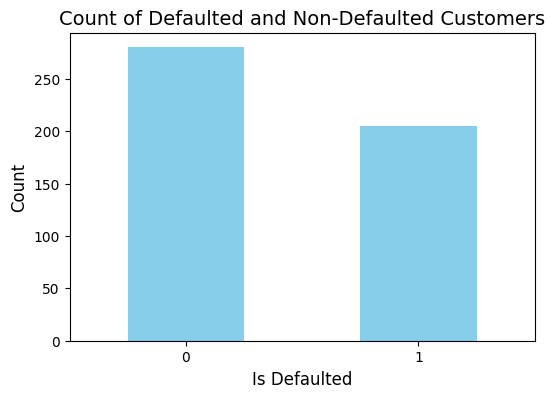

In [39]:
final_df.drop_duplicates(subset='CustomerId', keep='first')

# Count the occurrences of 'IsDefaulted' for the unique customers
defaulted_counts_by_customer = unique_customers['IsDefaulted'].value_counts()

# Plot the bar graph
plt.figure(figsize=(6, 4))
defaulted_counts_by_customer.plot(kind='bar', color='skyblue')
plt.xlabel('Is Defaulted', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Defaulted and Non-Defaulted Customers', fontsize=14)
plt.xticks(rotation=0)
plt.show()

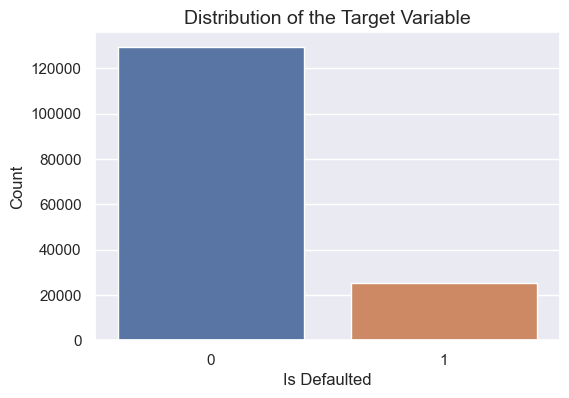

In [40]:

# Assuming 'df' is your DataFrame containing the data
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='IsDefaulted', data=final_df)
plt.xlabel('Is Defaulted', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of the Target Variable', fontsize=14)
plt.show()


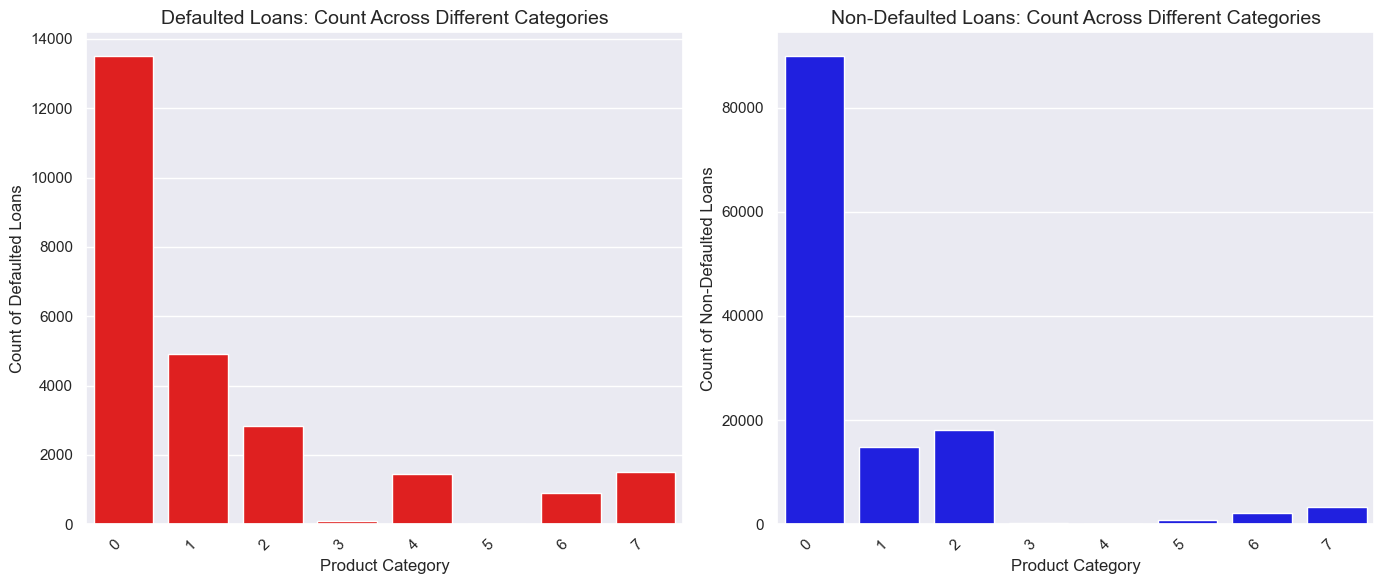

In [41]:


sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))

# Calculate the count of defaulted loans for each category
defaulted_counts = final_df[final_df['IsDefaulted'] == 1].groupby('ProductCategory')['IsDefaulted'].count()

# Sort the categories based on the count of defaulted loans
defaulted_counts = defaulted_counts.sort_values(ascending=False)

# Create the bar plot for defaulted loans
plt.subplot(1, 2, 1)
sns.barplot(x=defaulted_counts.index, y=defaulted_counts.values, color='red')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Defaulted Loans', fontsize=12)
plt.title('Defaulted Loans: Count Across Different Categories', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Calculate the count of non-defaulted loans for each category
non_defaulted_counts = final_df[final_df['IsDefaulted'] == 0].groupby('ProductCategory')['IsDefaulted'].count()

# Sort the categories based on the count of non-defaulted loans
non_defaulted_counts = non_defaulted_counts.sort_values(ascending=False)

# Create the bar plot for non-defaulted loans
plt.subplot(1, 2, 2)
sns.barplot(x=non_defaulted_counts.index, y=non_defaulted_counts.values, color='blue')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Non-Defaulted Loans', fontsize=12)
plt.title('Non-Defaulted Loans: Count Across Different Categories', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [42]:
final_df[(final_df.PaidOnDate>final_df.DueDate)].IsDefaulted.value_counts()

0    58787
1    16616
Name: IsDefaulted, dtype: int64

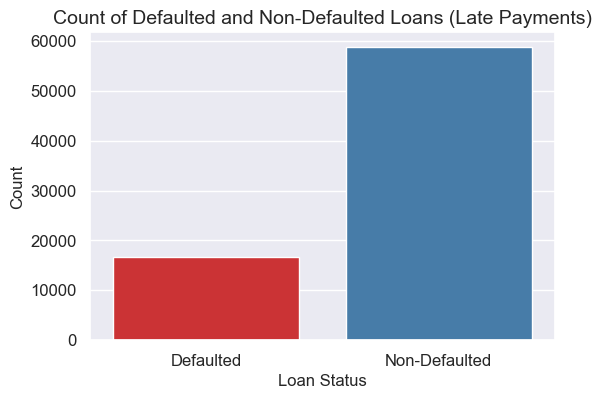

In [43]:

late_payments_df = final_df[final_df['PaidOnDate'] > final_df['DueDate']]

# Count the occurrences of defaulted and non-defaulted loans for late payments
late_defaulted_count = late_payments_df[late_payments_df['IsDefaulted'] == 1]['IsDefaulted'].count()
late_non_defaulted_count = late_payments_df[late_payments_df['IsDefaulted'] == 0]['IsDefaulted'].count()

# Create a DataFrame for the counts
data = {
    'IsDefaulted': ['Defaulted', 'Non-Defaulted'],
    'Count': [late_defaulted_count, late_non_defaulted_count]
}

count_df = pd.DataFrame(data)

# Plot the bar graph
plt.figure(figsize=(6, 4))
sns.barplot(x='IsDefaulted', y='Count', data=count_df, palette='Set1')
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Defaulted and Non-Defaulted Loans (Late Payments)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [44]:
final_df.skew()

CustomerId               -0.092326
TransactionStartTime      0.043186
Value                    32.355698
Amount                  -30.358117
TransactionId            -0.049251
BatchId                  -0.054194
SubscriptionId           -2.475188
ProviderId               -0.822327
ProductId                -0.924225
ProductCategory           2.619099
ChannelId                -1.441111
TransactionStatus        -5.107659
IssuedDateLoan            0.153175
AmountLoan              138.279936
LoanId                   -0.307685
InvestorId                2.601066
LoanApplicationId        -0.125081
ThirdPartyId             -0.062534
PaidOnDate                0.178309
DueDate                  -0.103207
IsDefaulted               1.824043
DueDay                   -0.003370
DueMonth                  1.909224
DueYear                  -2.354467
PaidOnDay                -0.035516
PaidOnMonth               1.313020
PaidOnYear               -1.517479
dtype: float64

/var/folders/v2/dmf5_xqs451462tf2qtfbvyw0000gr/T/ipykernel_2646/2197773729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sk)


<Axes: ylabel='Density'>

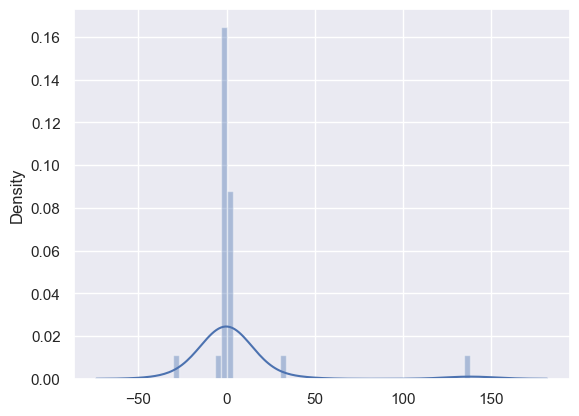

In [45]:
sk = final_df.skew()
sns.distplot(sk)

In [46]:
final_df['Value']= np.log(final_df['Value'])

In [47]:
final_df['AmountLoan']= np.log(final_df['AmountLoan'])

In [48]:
final_df['Amount']= np.log(final_df['Amount'])


/Users/da_m1_36/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
final_df.kurtosis()

CustomerId              -0.515006
TransactionStartTime    -0.963879
Value                    1.248272
Amount                   0.191204
TransactionId           -1.144538
BatchId                 -1.178576
SubscriptionId           4.597305
ProviderId              -0.983358
ProductId               -0.772307
ProductCategory          6.618830
ChannelId                0.135081
TransactionStatus       24.088494
IssuedDateLoan          -1.198583
AmountLoan               3.930374
LoanId                  -0.928282
InvestorId               5.633256
LoanApplicationId       -1.181507
ThirdPartyId            -1.175840
PaidOnDate              -0.984159
DueDate                 -1.134861
IsDefaulted              1.327150
DueDay                  -1.265811
DueMonth                 2.462257
DueYear                  3.543561
PaidOnDay               -1.258166
PaidOnMonth              0.053270
PaidOnYear               0.302747
dtype: float64

/var/folders/v2/dmf5_xqs451462tf2qtfbvyw0000gr/T/ipykernel_2646/1602057847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kt)


<Axes: ylabel='Density'>

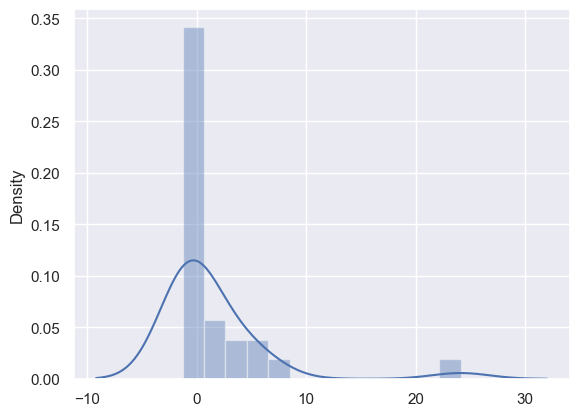

In [50]:
kt = final_df.kurtosis()
sns.distplot(kt)

In [51]:
constant = 1  # Choose an appropriate constant
final_df['SubscriptionId'] = final_df['SubscriptionId'] + constant

# Apply log transformation
final_df['SubscriptionId'] = np.log(final_df['SubscriptionId'])

In [52]:
constant = 1  # Choose an appropriate constant
final_df['AmountLoan'] = final_df['AmountLoan'] + constant

# Apply log transformation
final_df['AmountLoan'] = np.log(final_df['AmountLoan'])

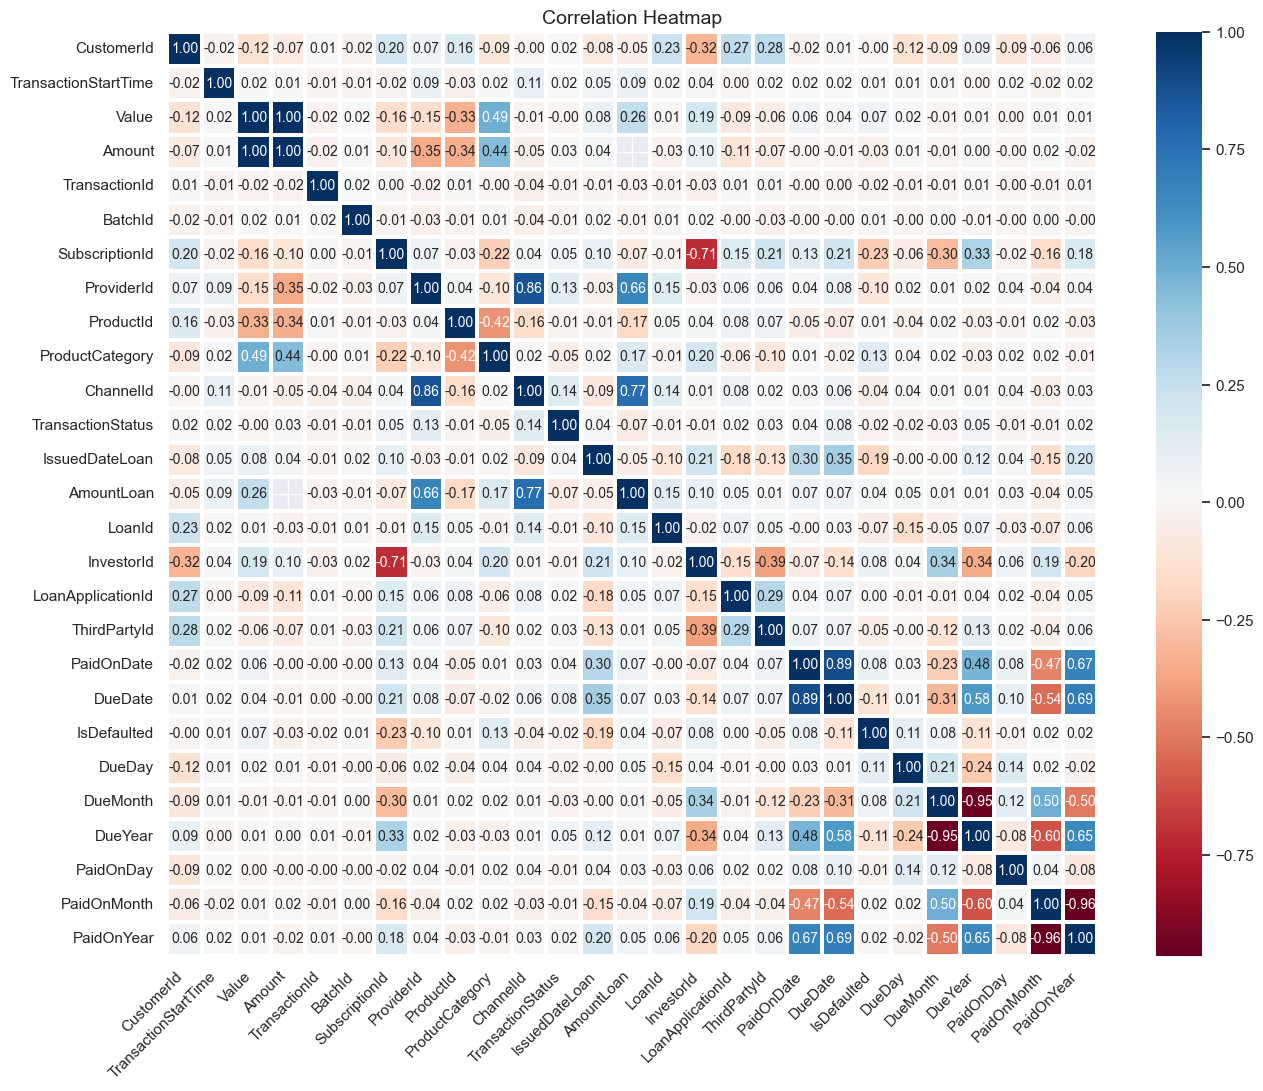

In [53]:
corrmat = final_df.corr()

# Increase the size of the plot
plt.figure(figsize=(15, 12))

# Create the heatmap with larger font size for annotations
sns.heatmap(corrmat, annot=True, annot_kws={'size': 10}, fmt=".2f", linewidths=1.5, cmap='RdBu')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [54]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.50) #Removing both constant and quasi-constant
var_thr.fit(final_df)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False])

## FEARTURE SELECTION

In [55]:
final_df = pd.DataFrame(final_df)

features = ['PaidOnYear', 'PaidOnMonth', 'PaidOnDay', 'DueYear', 'DueMonth', 'DueDay']
target = 'IsDefaulted'
X = final_df[features]
Y = final_df[target]

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (123738, 6)
x_test shape:  (30935, 6)
y_train shape:  (123738,)
y_test shape:  (30935,)


In [58]:
names = ['Logistic Regression', 'Nearest Neighbors'] 
        #  'Linear SVM', 'RBF SVM',          
        #  'Decision Tree', 'Random Forest',  'AdaBoost']

In [59]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    # SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    # DecisionTreeClassifier(max_depth=5),
    # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    # AdaBoostClassifier()
]

In [60]:
# results = []

# models = {}
# confusion = {}
# class_report = {}


# for name, clf in zip(names, classifiers):    
#     print ('Fitting {:s} model...'.format(name))
#     run_time = %timeit -q -o clf.fit(x_train, y_train)
    
#     print ('... predicting')
#     y_pred = clf.predict(x_train)   
#     y_pred_test = clf.predict(x_test)
    
#     print ('... scoring')
#     accuracy  = metrics.accuracy_score(y_train, y_pred)
#     precision = metrics.precision_score(y_train, y_pred, average='weighted')
#     recall    = metrics.recall_score(y_train, y_pred,  average='weighted')
    
#     f1        = metrics.f1_score(y_train, y_pred,  average='weighted')    
#     f1_test   = metrics.f1_score(y_test, y_pred_test,  average='weighted')    
    
#     # Save the results to dictionaries
#     models[name] = clf    
#     confusion[name] = metrics.confusion_matrix(y_train, y_pred)
#     class_report[name] = metrics.classification_report(y_train, y_pred)
    
#     results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
# results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
# results.set_index('Classifier', inplace= True)

# print ('... All done!')

In [61]:
import pandas as pd
from sklearn import metrics

results = []

models = {}
confusion = {}
class_report = {}

def fit_evaluate_model(name, clf):
    print('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(x_train, y_train)

    print('... predicting')
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    print('... scoring')
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred,  average='weighted')

    f1 = metrics.f1_score(y_train, y_pred,  average='weighted')
    f1_test = metrics.f1_score(y_test, y_pred_test,  average='weighted')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

# Store results in a DataFrame
    result_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
    result_df.set_index('Classifier', inplace=True)
    result_df.to_csv('results{}.csv'.format(name))
    print('Results for {} model saved to results_{}.csv'.format(name, name))

# Iterate through the classifiers and fit each model separately
for name, clf in zip(names, classifiers):
    fit_evaluate_model(name, clf)

print('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Results for Logistic Regression model saved to results_Logistic Regression.csv
Fitting Nearest Neighbors model...
... predicting
... scoring
Results for Nearest Neighbors model saved to results_Nearest Neighbors.csv
... All done!


In [62]:
# # Save the results to dictionaries
#     models[name] = clf
#     confusion[name] = metrics.confusion_matrix(y_train, y_pred)
#     class_report[name] = metrics.classification_report(y_train, y_pred)

#     results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

# # Store results in a DataFrame
#     result_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
#     result_df.set_index('Classifier', inplace=True)
#     result_df.to_csv('results{}.csv'.format(name))
#     print('Results for {} model saved to results_{}.csv'.format(name, name))

In [63]:
# data = {'PaidOnYear':2018, 'PaidOnMonth':11, 'PaidOnDay':6, 'DueYear':2019, 'DueMonth':6, 'DueDay':14}
# index =[0]
# cust_df = pd.DataFrame(data, index)
# cust_df


In [76]:
# Example input for prediction
input_data = {
    'PaidOnYear':[2018],
    'PaidOnMonth':[2],
    'PaidOnDay':[8],
    'DueYear':[2019],
    'DueMonth':[3],
    'DueDay':[8]
    # Add more features as required based on the model's input features
}

input_df = pd.DataFrame(input_data)


In [77]:
# Load the trained model
loaded_model = models['Nearest Neighbors']

# Make predictions on your input data
predictions = loaded_model.predict(input_df)
print(predictions)


[1]


In [70]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier

# Create an instance of the classifier (RandomForestClassifier in this example)
classifier = KNeighborsClassifier()  # Replace with your chosen classifier


In [71]:
num_folds = 5


In [72]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


In [73]:
# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X, Y, cv=kf, scoring='accuracy')


In [74]:
# Print the cross-validation scores for each fold
print("Cross-validation scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = np.mean(cross_val_scores)
std_accuracy = np.std(cross_val_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_accuracy)


Cross-validation scores: [0.96201713 0.96301923 0.95978665 0.96382621 0.96088446]
Mean Accuracy: 0.9619067380680416
Standard Deviation: 0.001447344437345216


In [75]:
from sklearn.linear_model import Lasso, Ridge

# Create Lasso (L1) and Ridge (L2) linear regression models
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization strength

# Fit the models to your training data
lasso_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(x_test)
ridge_predictions = ridge_model.predict(x_test)


In [66]:
# default_pred = clf.predict(x_test)
# print("The charges cost of the new customer is: ", default_pred)

In [79]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 2.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 880.7 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.0 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:01


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create a sequential model
model = Sequential()

# Add dense layers with Dropout
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.5))  # Dropout with a dropout rate of 0.5
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout with a dropout rate of 0.5
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

ModuleNotFoundError: No module named 'tensorflow'

In [82]:
# Example input for prediction
input_data = {
    'PaidOnYear':[2018],
    'PaidOnMonth':[2],
    'PaidOnDay':[8],
    'DueYear':[2019],
    'DueMonth':[3],
    'DueDay':[8]
    # Add more features as required based on the model's input features
}

input_df = pd.DataFrame(input_data)


In [83]:
# Load the trained model
loaded_model = models['Nearest Neighbors']

# Make predictions on your input data
predictions = loaded_model.predict(input_df)
print(predictions)

[1]
